# Exploratory Data Analysis

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="span5 alert alert-info">
<b>    
Business request:
</b>    
</div>

**Predict destination country of a new user**

****

<div class="span5 alert alert-info">
<b>    
Overview of data:
</b>    
</div>

**Destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found,no booking),and 'other'.** 

**All users are from USA.**

**The training and test sets are split by dates.** 

**In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted).** 

**In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.** 

****

<div class="span5 alert alert-info">
<b>    
Datasets available:
</b>    
</div>

**train_users.csv** 

**test_users.csv**

**sessions.csv**

**countries.csv**

**age_gender_bkts.csv**

**sample_submission.csv**

****

**Train data**

In [178]:
df_train = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/train_users_2.csv",encoding = "ISO-8859-1",na_values=['-unknown-',"NA",'-'])

In [179]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [180]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [181]:
#Transformations to datetime format

df_train['timestamp_first_active'] = df_train['timestamp_first_active'].astype(str)
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'])

df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])


In [182]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [183]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(11)
memory

****

**Session data**

In [184]:
df_sessions = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/sessions.csv",encoding = "ISO-8859-1",na_values=['-unknown-',"NA",'-'])

In [185]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [186]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [187]:
#categorising less frequent 'action' to 'Others' ,keeping a threshold of 24000

In [188]:
df_sessions['action'].value_counts()

show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
update_message          1
wishlists               1
sldf                    1
plaxo_cb                1
deactivated             1
Name: action, Length: 359, dtype: int64

In [ ]:
#appending 'action' to action col for simplicity after pivoting

In [189]:
df_sessions['action'] = 'action_' + df_sessions['action']

In [190]:
df_sessions['action'] = df_sessions['action'].mask(df_sessions['action'].map(df_sessions['action'].value_counts()) < 24000,'Others')

In [15]:
#grouping and getting aggregated mean value of sec_elapsed

In [191]:
df_sessions_grp = df_sessions.groupby(['user_id','action']).agg({'secs_elapsed':'mean'}).reset_index()

In [17]:
#just keeping action and ignoring action_type, action_detail which seem redundant.Devicetype can also be ignored 
#considering train data already has a first_device_type.

In [192]:
df_sessions_grp.head()

,user_id,action,secs_elapsed
0,00023iyk9l,Others,0.0
1,00023iyk9l,action_ajax_refresh_subtotal,723.5
2,00023iyk9l,action_confirm_email,567165.0
3,00023iyk9l,action_dashboard,1115.5
4,00023iyk9l,action_header_userpic,1599.0


In [193]:
df_sessions_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429842 entries, 0 to 1429841
Data columns (total 3 columns):
user_id         1429842 non-null object
action          1429842 non-null object
secs_elapsed    1359218 non-null float64
dtypes: float64(1), object(2)
memory usage: 32.7+ MB


In [20]:
# pivoting and adding action as columns

In [194]:
df_sessions_expanded = df_sessions_grp.pivot(index='user_id', columns='action', values='secs_elapsed').reset_index()

In [195]:
df_sessions_expanded.columns

Index(['user_id', 'Others', 'action_active', 'action_ajax_check_dates',
       'action_ajax_lwlb_contact', 'action_ajax_photo_widget_form_iframe',
       'action_ajax_refresh_subtotal', 'action_ask_question',
       'action_authenticate', 'action_calendar_tab_inner2', 'action_campaigns',
       'action_click', 'action_collections', 'action_complete_status',
       'action_confirm_email', 'action_create', 'action_dashboard',
       'action_edit', 'action_edit_verification', 'action_header_userpic',
       'action_identity', 'action_impressions', 'action_index',
       'action_listings', 'action_lookup', 'action_manage_listing',
       'action_notifications', 'action_other_hosting_reviews_first',
       'action_personalize', 'action_qt2', 'action_recommendations',
       'action_requested', 'action_reviews', 'action_search',
       'action_search_results', 'action_show', 'action_show_personalize',
       'action_similar_listings', 'action_similar_listings_v2',
       'action_social_conne

In [23]:
#joining session and train

In [196]:
df_train_join = df_train.join(df_sessions_expanded.set_index('user_id'), on='id')

In [197]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 59 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age                                     125461 non-null float64
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 

In [198]:
df_train_join['age'].value_counts()

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1933.0       1
1942.0       1
112.0        1
1938.0       1
1952.0       1
Name: age, Length: 127, dtype: int64

In [27]:
#From above we see some outliers like 1938..which we replace with mean age

In [199]:
mean_age = df_train_join[df_train_join['age'] <= 100].age.mean()
df_train_join.loc[(df_train_join['age'] > 100),'age'] = mean_age


In [200]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,action_search_results,action_show,action_show_personalize,action_similar_listings,action_similar_listings_v2,action_social_connections,action_track_page_view,action_travel_plans_current,action_unavailabilities,action_update
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 59 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age                                     125461 non-null float64
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 

****

**Countries data**

In [202]:
df_countries = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/countries.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [203]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null int64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 688.0+ bytes


In [204]:
df_countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675,eng,0.00


In [34]:
#keeping standard language abbreviations

In [205]:
df_countries['destination_language'] = df_countries['destination_language'].map({'eng':'en','deu':'de',
                                                                                 'spa':'es','fra':'fr','nld':'nl',
                                                                                 'por': 'pt','ita':'it'})
                                                                    

In [206]:
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,en,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,en,0.00
2,DE,51.165707,10.452764,7879.5680,357022,de,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,es,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fr,92.06


Text(0, 0.5, 'language_levenshtein_distance')

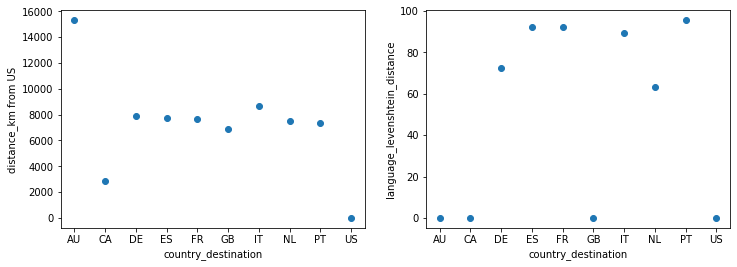

In [207]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(df_countries['country_destination'],df_countries['distance_km'],'o')
plt.xlabel("country_destination")
plt.ylabel("distance_km from US")


plt.subplot(1, 2, 2)
plt.plot(df_countries['country_destination'],df_countries['language_levenshtein_distance'],'o')
plt.xlabel("country_destination")
plt.ylabel("language_levenshtein_distance")


**AU looks farest from US**

**ES, FR, PT have highest language_levenshtein_distance i.e these languages have highest difference score from US english.**

In [39]:
#dropping data from countries and joining with train data

In [208]:
df_countries_ = df_countries[['country_destination','distance_km','destination_km2','destination_language','language_levenshtein_distance']] 

In [209]:
#adding language preference or likeliness to train data

In [210]:
lang_df_countries = df_countries_.groupby(['destination_language','country_destination'])['country_destination'].agg(count = 'count').reset_index()

lang_df_countries['country_destination'] = 'des_lang_' + lang_df_countries['country_destination']

In [211]:
lang_df_countries = lang_df_countries.pivot(index='destination_language', columns='country_destination', values='count').reset_index()
lang_df_countries

country_destination,destination_language,des_lang_AU,des_lang_CA,des_lang_DE,des_lang_ES,des_lang_FR,des_lang_GB,des_lang_IT,des_lang_NL,des_lang_PT,des_lang_US
0,de,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,en,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,es,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,fr,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,it,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [212]:
df_train_join['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

In [213]:
df_train_join = df_train_join.join(lang_df_countries.set_index('destination_language'), on='language')
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,des_lang_AU,des_lang_CA,des_lang_DE,des_lang_ES,des_lang_FR,des_lang_GB,des_lang_IT,des_lang_NL,des_lang_PT,des_lang_US
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [216]:
target_col_at_end = ['country_destination']
    
df_train_join = df_train_join[[c for c in df_train_join if c not in target_col_at_end] 
    + [c for c in target_col_at_end if c in df_train_join]]

In [217]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 69 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age                                     125461 non-null float64
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 

In [218]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,des_lang_CA,des_lang_DE,des_lang_ES,des_lang_FR,des_lang_GB,des_lang_IT,des_lang_NL,des_lang_PT,des_lang_US,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,US


****

**Gender data**

In [222]:
df_gender = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [223]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [224]:
df_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
#age bucket with max population

,age_bucket,country_destination,gender,population_in_thousands,year
15,25-29,AU,male,895.0,2015.0
53,50-54,CA,male,1400.0,2015.0
97,50-54,DE,male,3614.0,2015.0
150,35-39,ES,male,2117.0,2015.0
193,50-54,FR,female,2234.0,2015.0
248,45-49,GB,female,2349.0,2015.0
289,45-49,IT,female,2480.0,2015.0
325,45-49,NL,male,650.0,2015.0
343,35-39,PT,male,419.0,2015.0
391,20-24,US,male,11601.0,2015.0


In [237]:
#ignoring age 100+
df_gender = df_gender[df_gender['age_bucket'] != '100+']

In [240]:
idg = df_gender.groupby('country_destination')['population_in_thousands'].transform(max) == df_gender['population_in_thousands']
df_gender[idg]

,age_bucket,country_destination,gender,population_in_thousands,year
15,25-29,AU,male,895.0,2015.0
53,50-54,CA,male,1400.0,2015.0
97,50-54,DE,male,3614.0,2015.0
150,35-39,ES,male,2117.0,2015.0
193,50-54,FR,female,2234.0,2015.0
248,45-49,GB,female,2349.0,2015.0
289,45-49,IT,female,2480.0,2015.0
325,45-49,NL,male,650.0,2015.0
343,35-39,PT,male,419.0,2015.0
391,20-24,US,male,11601.0,2015.0


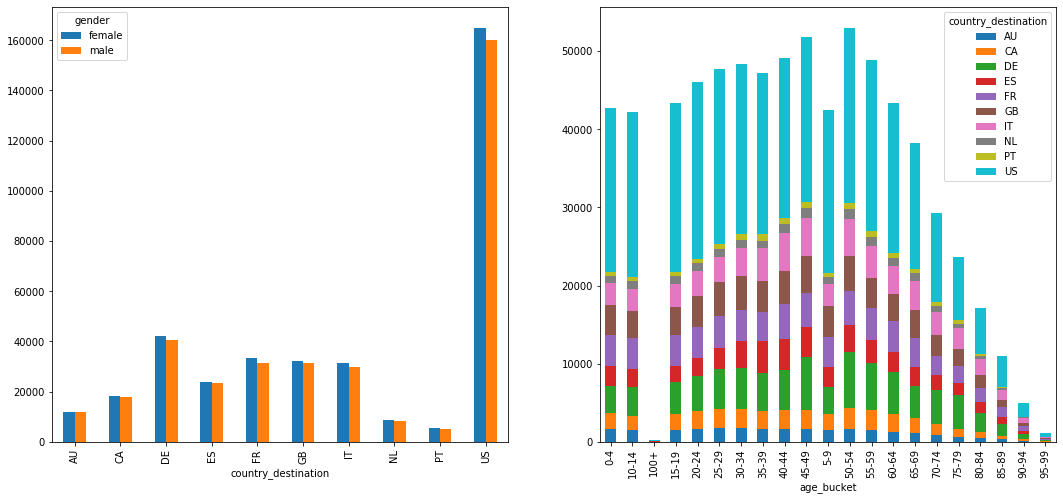

In [46]:
fig, (ax, ax2) = plt.subplots(figsize=(18,8),ncols=2)

df_gender.groupby(['country_destination','gender'])['population_in_thousands'].agg('sum').unstack().plot(kind='bar',ax=ax)
pd.pivot_table(df_gender, values="population_in_thousands", index="age_bucket", columns="country_destination", aggfunc=np.sum).plot.bar(stacked=True,ax=ax2)



**US seem to have highest population, also female population is higher compared to male for all destination countries.** 

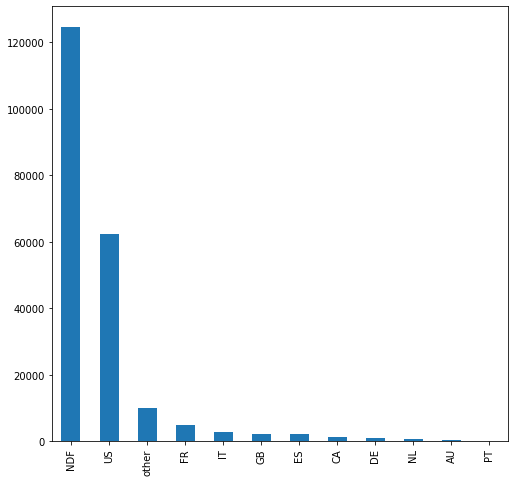

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)

cat_counts = df_train_join["country_destination"].value_counts()
cat_counts.plot.bar()

**Most of the users land up doing no bookings.**

**US is the destination country for most of the users, could be because all user data are from people of US which also implies that most users do bookings within the country.** 

**Dataset seem imbalanced with NDF and US contributing max to the data** 

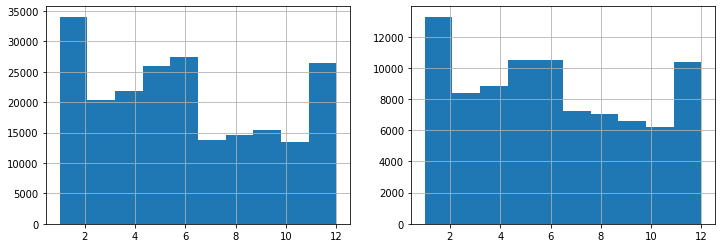

In [48]:
fig, (ax, ax2) = plt.subplots(figsize=(12,4),ncols=2)

df_train_join['date_account_created'].dt.month.hist(ax=ax)

df_train_join['date_first_booking'].dt.month.hist(ax=ax2)

**First half of the year and December has the max accounts created and first bookings**

**January has highest accounts created and first bookings**

In [49]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,similar_listings_v2,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US


In [50]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 62 columns):
id                               213451 non-null object
date_account_created             213451 non-null datetime64[ns]
timestamp_first_active           213451 non-null datetime64[ns]
date_first_booking               88908 non-null datetime64[ns]
gender                           117763 non-null object
age                              125461 non-null float64
signup_method                    213451 non-null object
signup_flow                      213451 non-null int64
language                         213451 non-null object
affiliate_channel                213451 non-null object
affiliate_provider               213451 non-null object
first_affiliate_tracked          207386 non-null object
signup_app                       213451 non-null object
first_device_type                213451 non-null object
first_browser                    186185 non-null object
Others                    

In [68]:
#bookings done

In [58]:
df_train_bookings = df_train_join[(df_train_join['country_destination'] != 'NDF')]
df_train_bookings

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,similar_listings_v2,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,NaN,NaN,basic,0,en,other,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,NaN,55.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,7682.945,fr,92.06,FR
213439,msucfwmlzc,2014-06-30,2014-06-30 23:47:29,2015-03-16,MALE,43.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
213441,omlc9iku7t,2014-06-30,2014-06-30 23:51:51,2014-08-13,FEMALE,34.0,basic,0,en,direct,...,81.000000,NaN,NaN,NaN,NaN,NaN,7730.724,es,92.25,ES
213443,0k26r3mir0,2014-06-30,2014-06-30 23:53:40,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,...,198.090909,NaN,609.0,NaN,NaN,36454.5,0.000,en,0.00,US


In [69]:
#bookings done for destination countries other than US

In [61]:
df_train_bookings_not_US = df_train_bookings[(df_train_bookings['country_destination'] != 'US')]
df_train_bookings_not_US

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,similar_listings_v2,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
12,k6np330cm1,2010-01-05,2010-01-05 06:08:59,2010-01-18,NaN,NaN,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,7682.9450,fr,92.06,FR
15,v4d5rl22px,2010-01-07,2010-01-07 20:45:55,2010-01-08,FEMALE,33.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,2828.1333,en,0.00,CA
19,gdka1q5ktd,2010-01-10,2010-01-10 01:08:17,2010-01-10,FEMALE,29.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,7682.9450,fr,92.06,FR
25,al8bcetz0g,2010-01-12,2010-01-12 13:14:44,2010-01-15,FEMALE,26.0,basic,0,en,other,...,NaN,NaN,NaN,NaN,NaN,NaN,7682.9450,fr,92.06,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213401,xif0n17eof,2014-06-30,2014-06-30 22:40:49,2014-07-15,NaN,45.0,basic,0,en,sem-brand,...,318.8125,NaN,1404.666667,1259.0,NaN,17689.0,7682.9450,fr,92.06,FR
213404,e5ysdcsb2v,2014-06-30,2014-06-30 22:43:36,2014-07-01,NaN,NaN,basic,0,en,direct,...,NaN,NaN,NaN,1250.0,NaN,NaN,NaN,NaN,NaN,other
213407,iu1abga5nx,2014-06-30,2014-06-30 22:46:35,2014-06-30,FEMALE,21.0,facebook,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,7730.7240,es,92.25,ES
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,NaN,55.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,7682.9450,fr,92.06,FR


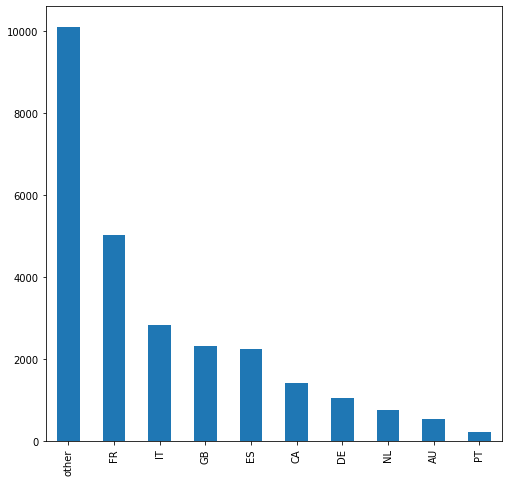

In [62]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)

cat_counts = low_class["country_destination"].value_counts()
cat_counts.plot.bar()

In [67]:
len(df_train_bookings_not_US.index)/len(df_train_bookings.index)

0.2984208395195033

**Destination countries which are other than US contribute approx 30% of bookings done.**

In [241]:
c = df_train.groupby(['language','country_destination'])['country_destination'].agg({'count':'count'})
c.head(50)

/Users/Anand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


count
language country_destination        
ca       NDF                       3
         US                        2
cs       ES                        1
         NDF                      23
         US                        6
         other                     2
da       ES                        2
         IT                        1
         NDF                      39
         US                       14
         other                     2
de       AU                        3
         CA                        1
         DE                       24
         ES                        7
         FR                       10
         GB                        5
         IT                        6
         NDF                     462
         NL                        2
         PT                        1
         US                      193
         other                    18
el       ES                        2
         FR                        1
         NDF                      18
         US                        2
         other                     1
en       AU                      531
         CA                     1412
         DE                     1016
         ES                     2183
         FR                     4882
         GB                     2284
         IT                     2763
         NDF                  119650
         NL                      744
         PT                      210
         US                    60845
         other                  9794
es       DE                        6
         ES                       20
         FR                       18
         GB                        6
         IT                        9
         NDF                     640
         NL                        1
         PT                        2
         US                      166
         other                    47

In [200]:
tyt = c.groupby(level=0).apply(lambda x:
                                x / float(x.sum())).reset_index()

tyt.head(10)

,language,country_destination,sales
0,ca,NDF,0.600000
1,ca,US,0.400000
2,cs,ES,0.031250
3,cs,NDF,0.718750
4,cs,US,0.187500
5,cs,other,0.062500
6,da,ES,0.034483
7,da,IT,0.017241
8,da,NDF,0.672414
9,da,US,0.241379


In [201]:
ff = pd.pivot_table(tyt, values="sales", index="language", columns="country_destination").reset_index()
ff

country_destination,language,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
0,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,0.400000,NaN
1,cs,NaN,NaN,NaN,0.031250,NaN,NaN,NaN,0.718750,NaN,NaN,0.187500,0.062500
2,da,NaN,NaN,NaN,0.034483,NaN,NaN,0.017241,0.672414,NaN,NaN,0.241379,0.034483
3,de,0.004098,0.001366,0.032787,0.009563,0.013661,0.006831,0.008197,0.631148,0.002732,0.001366,0.263661,0.024590
4,el,NaN,NaN,NaN,0.083333,0.041667,NaN,NaN,0.750000,NaN,NaN,0.083333,0.041667
5,en,0.002574,0.006844,0.004925,0.010581,0.023663,0.011071,0.013392,0.579941,0.003606,0.001018,0.294915,0.047471
6,es,NaN,NaN,0.006557,0.021858,0.019672,0.006557,0.009836,0.699454,0.001093,0.002186,0.181421,0.051366
7,fi,NaN,NaN,NaN,NaN,0.071429,NaN,NaN,0.500000,NaN,NaN,0.357143,0.071429
8,fr,0.001706,0.005973,0.006826,0.009386,0.058874,0.010239,0.009386,0.659556,0.003413,0.001706,0.216724,0.016212
9,hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [202]:
ff.columns

Index(['language', 'AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT',
       'US', 'other'],
      dtype='object', name='country_destination')

In [203]:
df_train_join = df_train_join.join(ff.set_index('language'), on='language')

In [204]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,...,0.004925,0.010581,0.023663,0.011071,0.013392,0.579941,0.003606,0.001018,0.294915,0.047471
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,0.004925,0.010581,0.023663,0.011071,0.013392,0.579941,0.003606,0.001018,0.294915,0.047471
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0.004925,0.010581,0.023663,0.011071,0.013392,0.579941,0.003606,0.001018,0.294915,0.047471
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0.004925,0.010581,0.023663,0.011071,0.013392,0.579941,0.003606,0.001018,0.294915,0.047471
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,0.004925,0.010581,0.023663,0.011071,0.013392,0.579941,0.003606,0.001018,0.294915,0.047471


In [ ]:
#month with lowest NNNOO

In [207]:
df_train_bookings['month'] = df_train_bookings['date_first_booking'].dt.month

In [211]:
df_train_bookings.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination,month
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US,8
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,9
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US,2
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,NaN,NaN,basic,0,en,other,...,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US,1
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US,1


In [222]:
o = df_train_bookings.groupby(['month','country_destination'])['country_destination'].agg({'count'})
o.head()


count
month country_destination       
1     AU                      59
      CA                      53
      DE                      59
      ES                     120
      FR                     335
      GB                     150
      IT                     172
      NL                      30
      PT                      10
      US                    4795

In [285]:
mean_age = df_train_join['age'].mean()
df_train_join['age'].fillna(mean_age,inplace=True)

df_train_join['age_grp'] = (df_train_join['age']/5).astype(int)
df_train_join['age_grp'] = (df_train_join['age_grp']*5).astype(str) + '-' + ((df_train_join['age_grp']*5)+5).astype(str)


In [286]:
o = df_train_join.groupby(['gender','age_grp','country_destination'])['country_destination'].agg({'count'})
o.head()

count
gender age_grp country_destination       
FEMALE 0-5     NDF                      1
               US                       1
       100-105 IT                       1
               NDF                     10
               US                       3
               other                    1
       15-20   AU                       2
               CA                      10
               DE                       4
               ES                       6
               FR                      20
               GB                      11
               IT                      13
               NDF                    382
               NL                       2
               PT                       2
               US                     207
               other                   26
       20-25   AU                       8
               CA                      21
               DE                      37
               ES                     112
               FR                     191
               GB                      84
               IT                     122
               NDF                   2474
               NL                      34
               PT                       8
               US                    1593
               other                  253
       25-30   AU                      45
               CA                      89
               DE                      79
               ES                     194
               FR                     356
               GB                     169
               IT                     198
               NDF                   5980
               NL                      57
               PT                      16